In [1]:
%matplotlib notebook

Idea: I want display the distance to source for different concentrations of different OSNs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json

from scipy import stats

# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
#savepath = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\plots\\Fig4\\DST')
savepath = 'declare path'
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\Behavior\\EtB')

# Figure 6Aiii

In [8]:

conc_to_show = ['EtB 10uM',
                'EtB 100uM',
                'EtB 1mM',
                'EtB 10mM',
                'EtB 50mM',
                'EtB 75mM',
                'EtB 100mM',
               ]
conc_in_numbers = [] # for plotting

genotype_to_show = ['Or42b SF (MS92xMS133)',
                    'w1118 (MS28)',
                    'Or1a SF (MS53xMS133)',            
                   ]

colors = ['magenta',
          'green',
          'blue']

markerstyle = ['.',
               "o",
               'v',
               'x',
               'D']

In [9]:
all_median_dst, conc_in_numbers, all_STD_dst, all_SEM_dst, CI_high, CI_low  = shared_functions.collect_median_for_dose_response(
    root_path,
    conc_to_show,
    genotype_to_show)

<IPython.core.display.Javascript object>


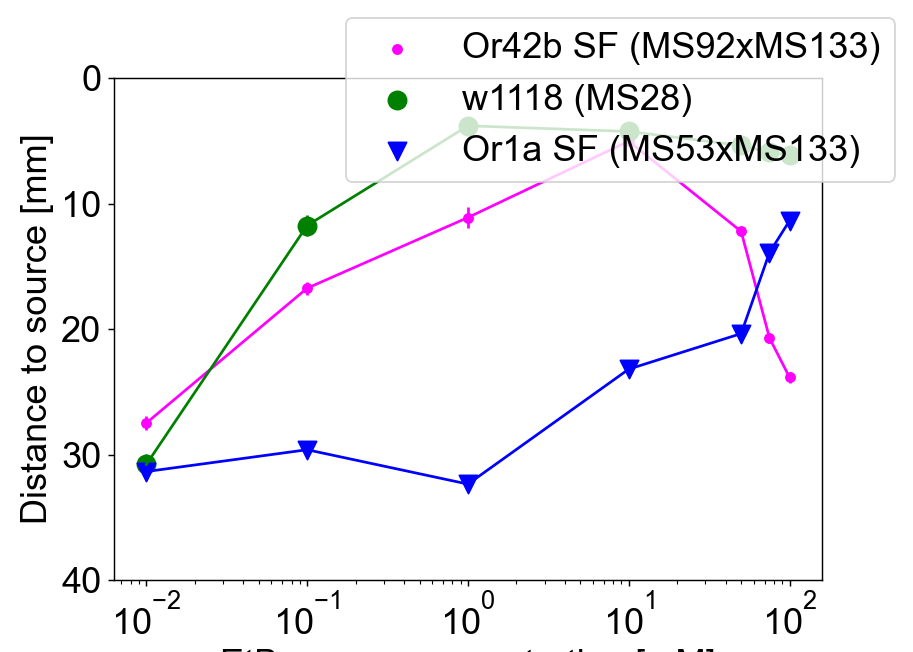

In [10]:
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
for current_genotype in range(len(genotype_to_show)):
    # since we have nan's we need to mask them to have continous plotting of lines
    mask = ~np.isnan(all_median_dst[:, current_genotype])
    ax.scatter(np.array(conc_in_numbers)[mask], all_median_dst[mask, current_genotype], 
               marker=markerstyle[current_genotype], color=colors[current_genotype], 
               label=genotype_to_show[current_genotype],
               s=100)
    ax.errorbar(np.array(conc_in_numbers)[mask],
               all_median_dst[mask, current_genotype],
               color=colors[current_genotype],
               #yerr=(CI_low[mask, current_genotype], CI_high[mask,current_genotype])) # shape(2, N): Separate - and + values for each bar. First row contains the lower 
                yerr=(all_SEM_dst[mask, current_genotype]))
ax.set_xscale('log')
ax.set_xlabel('EtB source concentration [mM]')
ax.set_ylabel('Distance to source [mm]')
ax.set_ylim(0,40)
ax.invert_yaxis()

fig.legend()

fig.savefig(Path(savepath, 'Fig6Aiii_EtB_all_DST.svg')) # uncomment to save plot